In [71]:
import pandas as pd
import numpy as np

In [72]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [73]:
import sys
sys.path.insert(0, '../../scripts')
from common_funcs import *

In [74]:
dmr_vals = pd.read_csv('../../data/ref/human_dmrs_quantified.tsv', sep='\t', header=None).set_index(0)

In [75]:
dmr_vals = np.abs((dmr_vals - 1) *-1)

In [ ]:
dmr_vals

In [76]:
# entropy_vals = my_gene_entropy(dmr_vals, norm=False)

In [77]:
# entropy_vals.to_csv('../../data/outs/mcg_entropy_based_specificity.tsv')

In [81]:
entropy_vals = pd.read_csv('../../data/outs/mcg_entropy_based_specificity.tsv').set_index('0')

In [82]:
entropy_vals.head()

,0.1
0,
human_orig_1,1.003260
human_orig_2,0.104146
human_orig_3,0.846085
human_orig_4,1.016329
human_orig_5,0.047807


In [92]:
dmr_vals.loc[spec].mean().mean()

0.2055759111783922

In [95]:
dmr_vals.loc[~dmr_vals.index.isin(spec)].mean().mean()

0.21206472108280958

In [83]:
annot = pd.read_csv('../../data/outs/dmrs_final_annot.tsv', sep='\t').set_index('3')

In [87]:
spec = annot.index[annot['human_specific']]

In [11]:
annot.shape

(1361958, 63)

In [98]:
from scipy.stats import spearmanr
spearmanr(annot.tss_dist.abs(), annot.conservation_idx, nan_policy='omit')

SpearmanrResult(correlation=-0.09848823656315787, pvalue=0.0)

In [13]:
annot.index.isin(entropy_vals.index).sum()

1361958

In [14]:
annot['type_specificity'] = entropy_vals

In [15]:
import matplotlib.pyplot as plt

In [16]:
annot.head()

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate,type_specificity
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN,1.003260
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN,0.104146
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN,0.846085
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN,1.016329
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN,0.047807


In [17]:
annot.mammal_level1.sum()

195435

In [18]:
annot['promoter_proximal'] = annot['tss_dist'].abs() <1000

# proximity pie charts

In [19]:
def tss_dist_pie_chart(name, annot=annot, ax=None, primate=False):
    if primate:
        locations = annot[name] & ~annot[name.replace('primate', 'mammal')]
        a = annot.loc[locations, 'promoter_proximal'].value_counts()
    else:
        a = annot.loc[annot[name], 'promoter_proximal'].value_counts()
    if ax:
        ax.pie(a.values, labels=a.index)
        ax.set_title(name + ' n = '+str(a.sum()))
    else:
        plt.pie(a.values, labels=a.index)
        plt.title(name + ' n = '+str(a.sum()))


In [20]:
levels_a = ['human_specific', 'mammal_level0',
            'mammal_level1', 'mammal_level2', 'mammal_level3']

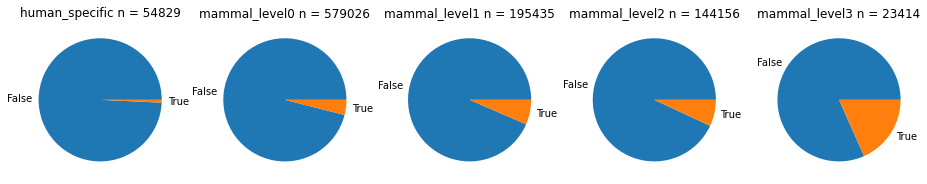

In [21]:
fig, axs = plt.subplots(1, 5, figsize=(16,3))
axs = axs.flatten()
for name, ax in zip(levels_a, axs):
    tss_dist_pie_chart(name, ax=ax)
plt.savefig('../../figures/dmr_distal_pie_chart_mammal_conserved.pdf', dpi=400, bbox_inches='tight', transparent=True)

In [22]:
levels_b = ['primate_level0',
            'primate_level1', 'primate_level2', 'primate_level3']

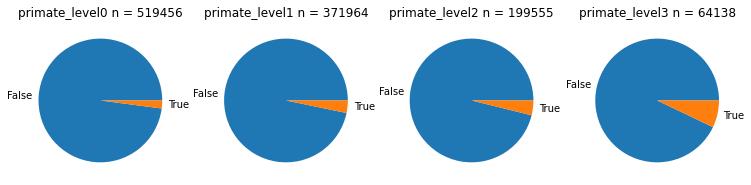

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(12.75,3))
axs = axs.flatten()
for name, ax in zip(levels_b, axs):
    tss_dist_pie_chart(name, ax=ax, primate=True)
plt.savefig('../../figures/dmr_distal_pie_chart_primate_conserved.pdf', dpi=400, bbox_inches='tight', transparent=True)

# cell type specificity distribution plots

In [24]:
import seaborn as sns

In [25]:
def tss_dist_pie_chart(name, annot=annot, ax=None, primate=False):
    if primate:
        locations = annot[name] & ~annot[name.replace('primate', 'mammal')]
        a = annot.loc[locations, 'promoter_proximal'].value_counts()
    else:
        a = annot.loc[annot[name], 'promoter_proximal'].value_counts()
    if ax:
        ax.pie(a.values, labels=a.index)
        ax.set_title(name + ' n = '+str(a.sum()))
    else:
        plt.pie(a.values, labels=a.index)
        plt.title(name + ' n = '+str(a.sum()))


In [26]:
def specificity_kde_plot(name, annot=annot, ax=None):
    if 'primate' in name:
        locations = annot[name] & ~annot['promoter_proximal'] & ~annot[name.replace('primate', 'mammal')]
    else:
        locations = annot[name] & ~annot['promoter_proximal']
    sns.kdeplot(annot.loc[locations, 'type_specificity'], ax=ax,
                fill=True, color='#D5D924')
    if ax:
        ax.set_title(name)
    else:
        plt.set_title(name)

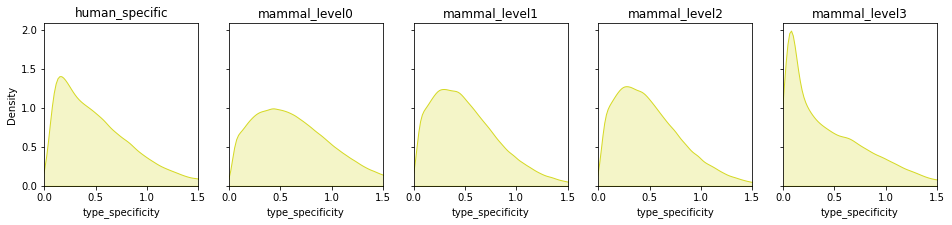

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(16, 3), sharey=True, sharex=True)
axs = axs.flatten()
for name, ax in zip(levels_a, axs):
    specificity_kde_plot(name, ax=ax)
ax.set_xlim(0, 1.5)
plt.savefig('../../figures/mammal_dmr_cell_specifcity.pdf', dpi=400, bbox_inches='tight' )

In [29]:
from scipy.stats import fisher_exact, ttest_ind

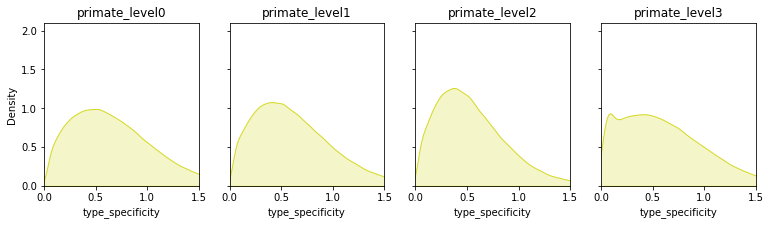

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(12.75, 3), sharey=True, sharex=True)
axs = axs.flatten()
for name, ax in zip(levels_b, axs):
    specificity_kde_plot(name, ax=ax)
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 2.1)
plt.savefig('../../figures/primate_dmr_cell_specifcity.pdf', dpi=400, bbox_inches='tight' )

In [31]:
annot.head()

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate,type_specificity,promoter_proximal
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN,1.003260,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN,0.104146,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN,0.846085,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN,1.016329,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN,0.047807,False


In [32]:
annot_use = annot.loc[~annot.promoter_proximal]

In [33]:
from scipy.stats import spearmanr

In [35]:
spearmanr(annot_use.type_specificity, annot_use.conservation_idx, nan_policy='omit')

SpearmanrResult(correlation=-0.16524886100655412, pvalue=0.0)

In [37]:
ttest_ind(annot_use.loc[~annot_use.primate_level3, 'type_specificity'], annot_use.loc[annot_use.mammal_level3, 'type_specificity'], alternative='greater')

Ttest_indResult(statistic=70.41382656958066, pvalue=0.0)

In [40]:
fisher_exact([[annot.loc[annot.mammal_level3, 'promoter_proximal'].sum(), annot.loc[~annot.mammal_level3 & annot.mammal_level2, 'promoter_proximal'].sum()],
              [(~annot.loc[annot.mammal_level3, 'promoter_proximal']).sum(), (~annot.loc[~annot.mammal_level3 &annot.mammal_level2, 'promoter_proximal']).sum()]])

(3.584664971046794, 0.0)

In [44]:
fisher_exact([[annot.loc[annot.mammal_level2, 'promoter_proximal'].sum(), annot.loc[~annot.mammal_level2& annot.mammal_level1, 'promoter_proximal'].sum()],
              [(~annot.loc[annot.mammal_level2, 'promoter_proximal']).sum(), (~annot.loc[~annot.mammal_level2 &annot.mammal_level1, 'promoter_proximal']).sum()]])

(1.3556290513598905, 4.202871928640392e-44)

In [45]:
fisher_exact([[annot.loc[annot.mammal_level1, 'promoter_proximal'].sum(), annot.loc[~annot.mammal_level1 & annot.mammal_level0, 'promoter_proximal'].sum()],
              [(~annot.loc[annot.mammal_level1, 'promoter_proximal']).sum(), (~annot.loc[~annot.mammal_level1 &annot.mammal_level0, 'promoter_proximal']).sum()]])

(2.5502902916449965, 0.0)

In [67]:
ttest_ind(annot_use.loc[annot_use.mammal_level3, 'type_specificity'],
           annot_use.loc[~annot_use.mammal_level3 & annot_use.mammal_level2, 'type_specificity'])

Ttest_indResult(statistic=-24.460506345342665, pvalue=7.356420405965531e-132)

In [68]:
ttest_ind(annot_use.loc[annot_use.mammal_level2, 'type_specificity'],
           annot_use.loc[~annot_use.mammal_level2 & annot_use.mammal_level1, 'type_specificity'])

Ttest_indResult(statistic=-21.904773025161237, pvalue=3.208032993254121e-106)

In [69]:
ttest_ind(annot_use.loc[annot_use.mammal_level1, 'type_specificity'],
           annot_use.loc[~annot_use.mammal_level1 & annot_use.mammal_level0, 'type_specificity'])

Ttest_indResult(statistic=-173.77758025321288, pvalue=0.0)

In [70]:
ttest_ind(annot_use.loc[annot_use.mammal_level0, 'type_specificity'],
           annot_use.loc[~annot.mammal_level0 & annot_use.human_specific, 'type_specificity'], alternative='less')

Ttest_indResult(statistic=64.78875482232112, pvalue=1.0)

In [55]:
fisher_exact([[annot.loc[annot.primate_level3, 'promoter_proximal'].sum(), annot.loc[~annot.primate_level3 & annot.primate_level2, 'promoter_proximal'].sum()],
              [(~annot.loc[annot.primate_level3, 'promoter_proximal']).sum(), (~annot.loc[~annot.primate_level3 &annot.primate_level2, 'promoter_proximal']).sum()]])

(1.490550983901646, 1.227050272816328e-107)

In [57]:
fisher_exact([[annot.loc[annot.primate_level2, 'promoter_proximal'].sum(), annot.loc[~annot.primate_level2& annot.primate_level1, 'promoter_proximal'].sum()],
              [(~annot.loc[annot.primate_level2, 'promoter_proximal']).sum(), (~annot.loc[~annot.primate_level2 & annot.primate_level1, 'promoter_proximal']).sum()]])

(1.7780374973911728, 0.0)

In [58]:
fisher_exact([[annot.loc[annot.primate_level1, 'promoter_proximal'].sum(), annot.loc[~annot.primate_level1 & annot.primate_level0, 'promoter_proximal'].sum()],
              [(~annot.loc[annot.primate_level1, 'promoter_proximal']).sum(), (~annot.loc[~annot.primate_level1 &annot.primate_level0, 'promoter_proximal']).sum()]])

(2.157141305935062, 0.0)

In [63]:
ttest_ind(annot_use.loc[annot.primate_level3, 'type_specificity'],
           annot_use.loc[~annot.primate_level3 & annot.primate_level2, 'type_specificity'])

Ttest_indResult(statistic=53.27595283907815, pvalue=0.0)

In [64]:
ttest_ind(annot_use.loc[annot_use.primate_level2, 'type_specificity'],
           annot_use.loc[~annot_use.primate_level2 & annot_use.primate_level1, 'type_specificity'])

Ttest_indResult(statistic=-142.34415108423678, pvalue=0.0)

In [65]:
ttest_ind(annot_use.loc[annot_use.primate_level1, 'type_specificity'],
           annot_use.loc[~annot_use.primate_level1 & annot_use.primate_level0, 'type_specificity'])

Ttest_indResult(statistic=-105.28906919756008, pvalue=0.0)

In [66]:
ttest_ind(annot_use.loc[annot_use.primate_level0, 'type_specificity'],
           annot_use.loc[~annot_use.primate_level0 & annot_use.human_specific, 'type_specificity'], alternative='less')

Ttest_indResult(statistic=76.41578625622336, pvalue=1.0)

In [100]:
ttest_ind(annot_use.loc[annot_use.primate_level0, 'type_specificity'],
           annot_use.loc[~annot_use.primate_level0, 'type_specificity'], alternative='less')

Ttest_indResult(statistic=40.95327868463508, pvalue=1.0)

# get TE enrichment

In [75]:
def simplify_annotation(annot_string):
    if 'exon' in annot_string:
        return 'exon'
    if 'promoter' in annot_string:
        return 'promoter'
    if 'intron' in annot_string:
        return 'intron'
    if 'Intergenic' in annot_string:
        return 'Intergenic'
    if 'TTS' in annot_string:
        return 'TTS'
    if 'CpG' in annot_string:
        return 'CpG'
    # if '?' in annot_string:
    #     return 'uncertain'
    if annot_string.count('|') == 2:
        return annot_string.split('|')[1]
    return annot_string

In [76]:
def annotate_tes(annot_string):
    # if 'HERV' in annot_string:
    #     return 'HERV'
    if 'LTR' in annot_string:
        return 'LTR'
    if 'LINE' in annot_string:
        return 'LINE'
    if 'SINE' in annot_string:
        return 'SINE'
    if 'DNA' in annot_string:
        return 'DNA'
    else:
        return 'not_te'
    return annot_string

In [77]:
annot['te_annotations'] = [annotate_tes(i) for i in annot.homer_annot]

In [78]:
levels_a = ['human_specific', 'mammal_level0',
            'mammal_level1', 'mammal_level2', 'mammal_level3']

In [79]:
def proportion_te(te, name):
    check = annot.loc[annot[name]].te_annotations == te
    return check.sum() /annot[name].sum()

In [80]:
dna_props = [(annot.te_annotations == 'DNA').sum()/annot.shape[0]] + [proportion_te('DNA', name) for name in levels_a]

sine_props = [(annot.te_annotations == 'SINE').sum()/annot.shape[0]] + [proportion_te('SINE', name) for name in levels_a]

line_props = [(annot.te_annotations == 'LINE').sum()/annot.shape[0]] + [proportion_te('LINE', name) for name in levels_a]

ltr_props = [(annot.te_annotations == 'LTR').sum()/annot.shape[0]] + [proportion_te('LTR', name) for name in levels_a]

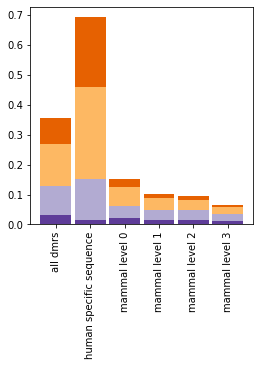

In [81]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(np.arange(len(dna_props)),
       dna_props,
       color='#5E3C99',
       width=.9
      )
ax.bar(np.arange(len(sine_props)),
       sine_props,
       color='#B2ABD2'
       , bottom=dna_props,
       width=.9
      )
ax.bar(np.arange(len(line_props)),
       line_props,
       color='#FDB863'
       , bottom=np.array(dna_props) + np.array(sine_props),
       width=.9
      )
ax.bar(np.arange(len(ltr_props)),
       ltr_props,
       color='#E66101'
       , bottom=np.array(dna_props) + np.array(sine_props) + np.array(line_props),
       width=.9
      )
ax.set_xticks(np.arange(6), labels = ['all dmrs',
                                      'human specific sequence',
                                      'mammal level 0', 'mammal level 1',
                                      'mammal level 2', 
                                      'mammal level 3'], 
                                     rotation=90)
# plt.savefig('../../figures/mammal_dmr_te_enrichment.pdf', dpi=400, bbox_inches='tight' )

In [90]:
(annot.mammal_level3 & (annot.te_annotations != 'not_te')).sum()/annot.mammal_level3.sum()

0.06534551977449389

In [91]:
(annot.human_specific & (annot.te_annotations != 'not_te')).sum()/annot.human_specific.sum()

0.6931003665943205

In [82]:
def proportion_te(te, name):
    mammal_name = name.replace('primate', 'mammal')
    check = annot.loc[annot[name] & ~annot[mammal_name]].te_annotations == te
    return check.sum() /(annot[name] & ~annot[mammal_name]).sum()

In [83]:
annot.primate_level2.sum()

343711

In [84]:
levels_b

['primate_level0', 'primate_level1', 'primate_level2', 'primate_level3']

In [85]:
dna_props = [proportion_te('DNA', name) for name in levels_b]

sine_props = [proportion_te('SINE', name) for name in levels_b]

line_props = [proportion_te('LINE', name) for name in levels_b]

ltr_props = [proportion_te('LTR', name) for name in levels_b]

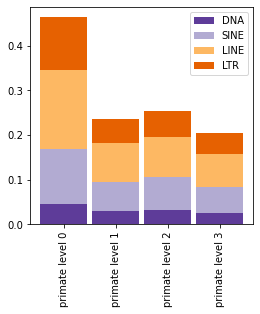

In [86]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(np.arange(len(dna_props)),
       dna_props,
       color='#5E3C99',
       width=.9,
       label='DNA'
      )
ax.bar(np.arange(len(sine_props)),
       sine_props,
       color='#B2ABD2'
       , bottom=dna_props,
       label='SINE',
       width=.9
      )
ax.bar(np.arange(len(line_props)),
       line_props,
       color='#FDB863',
       label='LINE',
        bottom=np.array(dna_props) + np.array(sine_props),
       width=.9
      )
ax.bar(np.arange(len(ltr_props)),
       ltr_props,
       color='#E66101',
       label='LTR', 
       bottom=(np.array(dna_props) + np.array(sine_props) + np.array(line_props)),
       width=.9
      )
ax.set_xticks(np.arange(4), labels = [
                                      'primate level 0', 
                                      'primate level 1',
                                      'primate level 2', 
                                      'primate level 3'], 
             rotation=90)
plt.legend()
plt.savefig('../../figures/primate_dmr_te_enrichment.pdf', dpi=400, bbox_inches='tight' )

In [41]:
def specificity_kde_plot_te(name, annot=annot, ax=None):
    if 'primate' in name:
        locations = annot[name] & ~annot['promoter_proximal'] & ~annot[name.replace('primate', 'mammal')]
    else:
        locations = (annot.te_annotations == name) & ~annot['promoter_proximal']
    sns.kdeplot(annot.loc[locations, 'type_specificity'], ax=ax,
                fill=True, color='#D5D924')
    if ax:
        ax.set_title(name)
    else:
        plt.set_title(name)

<AxesSubplot:xlabel='type_specificity', ylabel='Density'>

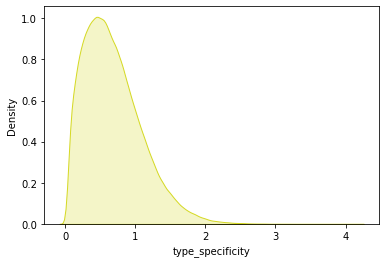

In [42]:
sns.kdeplot(annot.loc[~(annot.te_annotations == 'not_te'), 'type_specificity'], fill=True, color='#D5D924')

In [43]:
annot.te_annotations.unique()

array(['not_te', 'LINE', 'SINE', 'LTR', 'DNA'], dtype=object)

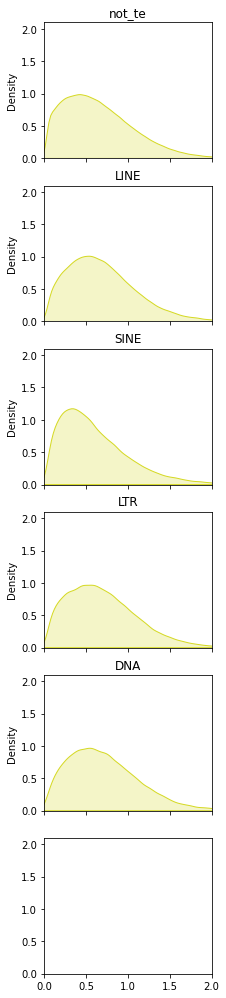

In [44]:
fig, axs = plt.subplots(6, 1, figsize=(3, 17.5), sharey=True, sharex=True)
axs = axs.flatten()
for name, ax in zip(annot.te_annotations.unique(), axs):
    specificity_kde_plot_te(name, ax=ax)
ax.set_xlim(0, 2)
ax.set_ylim(0, 2.1)
plt.savefig('../../figures/dmr_te_cell_specifcity.pdf', dpi=400, bbox_inches='tight' )

In [45]:
def specificity_kde_plot_te(name, annot=annot, ax=None, specific=False):
    if 'primate' in name:
        locations = annot[name] & ~annot['promoter_proximal'] & ~annot[name.replace('primate', 'mammal')]
    elif specific:
        locations = (annot.te_annotations == name) & ~annot['promoter_proximal'] & annot['human_specific']
    else:
        locations = (annot.te_annotations == name) & ~annot['promoter_proximal']
    sns.kdeplot(annot.loc[locations, 'type_specificity'], ax=ax,
                fill=True, color='#D5D924')
    if ax:
        ax.set_title(name)
    else:
        plt.set_title(name)

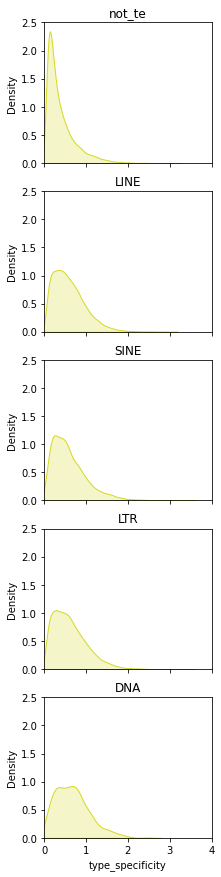

In [46]:
fig, axs = plt.subplots(5, 1, figsize=(3, 15), sharey=True, sharex=True)
axs = axs.flatten()
for name, ax in zip(annot.te_annotations.unique(), axs):
    specificity_kde_plot_te(name, ax=ax, specific=True)
ax.set_xlim(0, 4)
ax.set_ylim(0, 2.5)
plt.savefig('../../figures/dmr_human_specific_te_cell_specifcity.pdf', dpi=400, bbox_inches='tight' )